Notebook to plot a climatological month from ECCOv4r3
specifically cell centered, scalar data from 
  ftp://ecco.jpl.nasa.gov/Version4/Release3/nctiles_climatology

Trying out the new ecco v4 python library ... 

In [1]:
import numpy as np
import xarray as xr
import ecco_v4_py as ecco
import sys

#sys.path.append('/Users/tim/work/ECCOv4-py/ecco_v4_py')
grid_dir = '../../grids/llc90_nctiles/'
clim_dir = '../../release3_climatology/nctiles_climatology/THETA/'

var = 'GRID'
var_type = 'grid'
grid = ecco.load_all_tiles_from_netcdf(grid_dir,var,var_type)

var = 'THETA'
var_type = 'c' # as in, at cell centers
theta_clim = ecco.load_all_tiles_from_netcdf(clim_dir,var,var_type)



>>> LOADING TILES FROM NETCDF

loading ../../grids/llc90_nctiles/GRID.0001.nc
loading ../../grids/llc90_nctiles/GRID.0002.nc
loading ../../grids/llc90_nctiles/GRID.0003.nc
loading ../../grids/llc90_nctiles/GRID.0004.nc
loading ../../grids/llc90_nctiles/GRID.0005.nc
loading ../../grids/llc90_nctiles/GRID.0006.nc
loading ../../grids/llc90_nctiles/GRID.0007.nc
loading ../../grids/llc90_nctiles/GRID.0008.nc
loading ../../grids/llc90_nctiles/GRID.0009.nc
loading ../../grids/llc90_nctiles/GRID.0010.nc
loading ../../grids/llc90_nctiles/GRID.0011.nc
loading ../../grids/llc90_nctiles/GRID.0012.nc
loading ../../grids/llc90_nctiles/GRID.0013.nc
total file load and concat time  2.75340795517 s
Finished loading all 13 tiles of GRID

>>> LOADING TILES FROM NETCDF

loading ../../release3_climatology/nctiles_climatology/THETA/THETA.0001.nc
loading ../../release3_climatology/nctiles_climatology/THETA/THETA.0002.nc
loading ../../release3_climatology/nctiles_climatology/THETA/THETA.0003.nc
loading ../..

In [2]:
# Compute the anomaly
theta_clim_anom = theta_clim - theta_clim.mean('time')

In [3]:
# Merge the two together ... 
v4 = xr.merge([theta_clim_anom,grid])
v4

<xarray.Dataset>
Dimensions:   (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_g: 50, tile: 13, time: 12)
Coordinates:
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
  * k         (k) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * j         (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    dep       (k) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.03 95.1 ...
    tim       (time) float64 15.0 46.0 75.0 106.0 136.0 167.0 197.0 228.0 ...
    timestep  (time) float64 732.0 1.428e+03 2.172e+03 2.892e+03 3.636e+03 ...
    lon_c     (tile, j, i) float64 -111.6 -111.3 -110.9 -110.5 -110.0 -109.3 ...
    lat_c     (tile, j, i) float64 -88.24 -88.38 -88.52 -88.66 -88.8 -88.94 ...
  * tile      (tile) int64 1 2 3 4 5 6 7 8 9 10 11 12 13
  * i_g       (i_g) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * j_g       (j_g) float64 1.0

In [4]:
xc=v4.XC
xc

<xarray.DataArray 'XC' (tile: 13, j: 90, i: 90)>
array([[[-111.606468, -111.303001, ...,   64.805206,   64.819168],
        [-104.819603, -103.928444, ...,   64.410118,   64.4524  ],
        ..., 
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ]],

       [[ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        ..., 
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ]],

       ..., 
       [[-127.5     , -127.5     , ..., -127.5     , -127.5     ],
        [-126.5     , -126.5     , ..., -126.5     , -126.5     ],
        ..., 
        [ -39.5     ,  -39.5     , ...,  -39.5     ,  -39.5     ],
        [ -38.5     ,  -38.5     , ...,  -38.5     ,  -38.5     ]],

       [[-127.5     , -127.5     , ..., -115.505669, -115.166985],
        [-126.5    

<xarray.DataArray (dim_0: 13, dim_1: 90, dim_2: 90)>
array([[[-111.606468, -111.303001, ...,   64.805206,   64.819168],
        [-104.819603, -103.928444, ...,   64.410118,   64.4524  ],
        ..., 
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ]],

       [[ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        ..., 
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     , ...,   50.5     ,   51.5     ]],

       ..., 
       [[ 232.5     ,  232.5     , ...,  232.5     ,  232.5     ],
        [ 233.5     ,  233.5     , ...,  233.5     ,  233.5     ],
        ..., 
        [ -39.5     ,  -39.5     , ...,  320.5     ,  320.5     ],
        [ -38.5     ,  -38.5     , ...,  321.5     ,  321.5     ]],

       [[ 232.5     ,  232.5     , ...,  244.494331,  244.833015],
        [ 233.5

/Users/tim/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/tim/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/tim/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tim/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/tim/anaconda3/envs/py27/lib

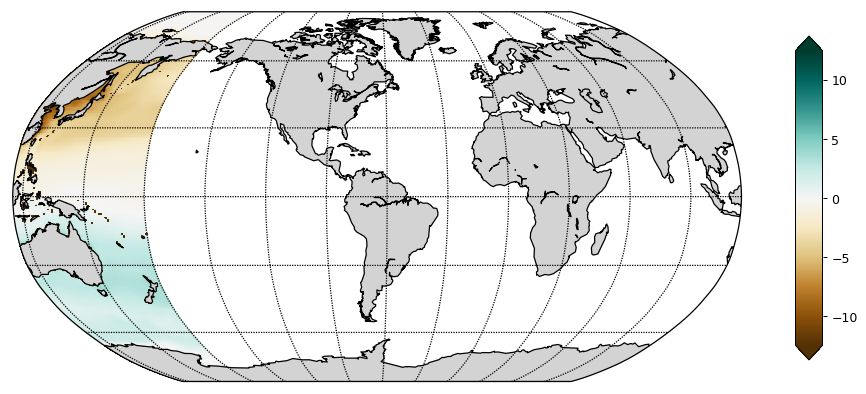

In [5]:
# Now make a plot ...
# First grab a nice colormap ...
import matplotlib.pylab as pyl
import matplotlib.pyplot as plt
# Colorbrewer colors are native in matplotlib ... 
#from palettable.colorbrewer.diverging import BrBG_9
pyl.figure(figsize=(12,6),dpi=90)

theta_plot = v4.THETA.sel(time=2,k=1)
cmax = np.max(np.abs(theta_plot))

# Convert [-180,180]->[0,360]
lons_360 = np.rad2deg(np.unwrap(np.deg2rad(v4.XC.values), axis=0))
xc = xr.DataArray(lons_360)
print(xc)
v4.YC
ecco.plot_tiles_proj(xc,v4.YC,
                     theta_plot,
                     plot_type = 'pcolor',
                     cmap='BrBG',
                     user_lon_0 = 115,
                     cmin=-cmax,cmax=cmax,
                     show_colorbar=True,
                     projection_type = 'robin')
plt.show()

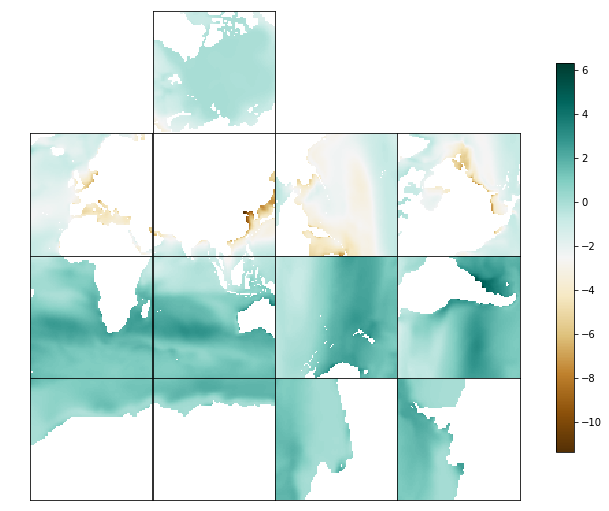

In [6]:
pyl.figure(figsize=(12,6),dpi=90)

theta_plot = v4.THETA.sel(time=1,k=1)
cmax = np.max(np.abs(theta_plot))

# new optional argument:
# layout  -  either 'llc' or 'latlon'  default is 'llc
ecco.plot_tiles(theta_plot, cbar=True, user_cmap='BrBG', 
                layout='latlon', tile_labels=False)
